/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


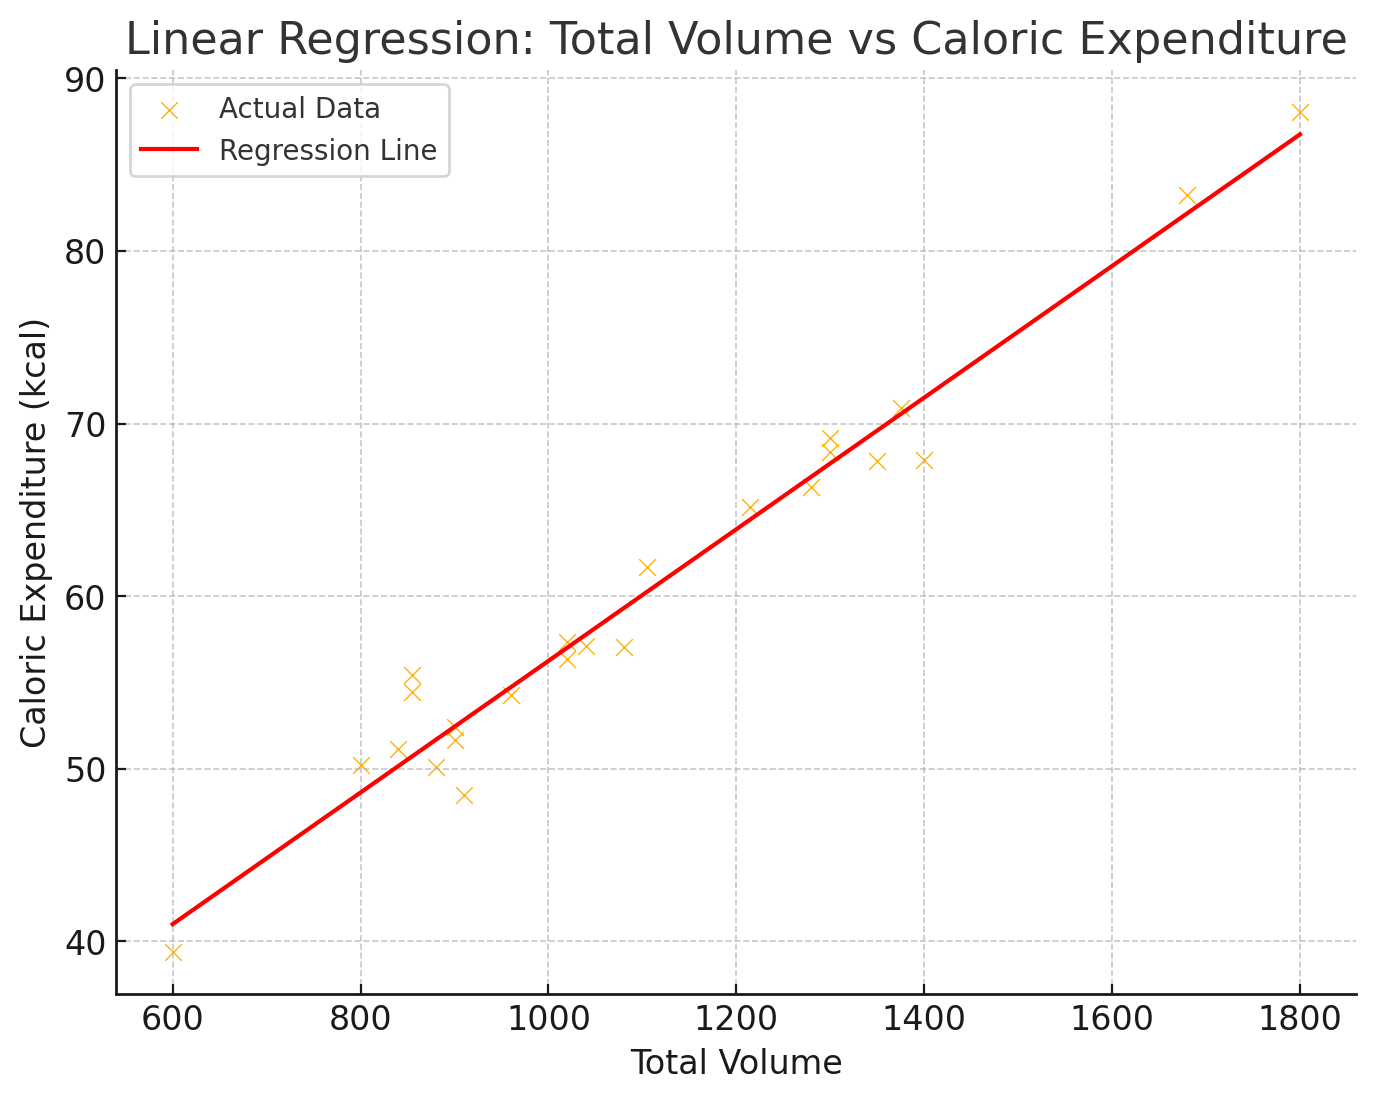

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('final_periodic_workout_data_23Mar_23Apr.csv')
df = df.dropna(subset=['Exercise'])
df['Total Volume'] = df['Weight Load (kg)'] * df['Repetition Count']
X = df[['Total Volume']]
y = df['Caloric Expenditure (kcal)']

lr = LinearRegression()
lr.fit(X, y)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Total Volume'], y=y, label='Actual Data')
sns.lineplot(x=X['Total Volume'], y=lr.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression: Total Volume vs Caloric Expenditure')
plt.xlabel('Total Volume')
plt.ylabel('Caloric Expenditure (kcal)')
plt.legend()
plt.show()

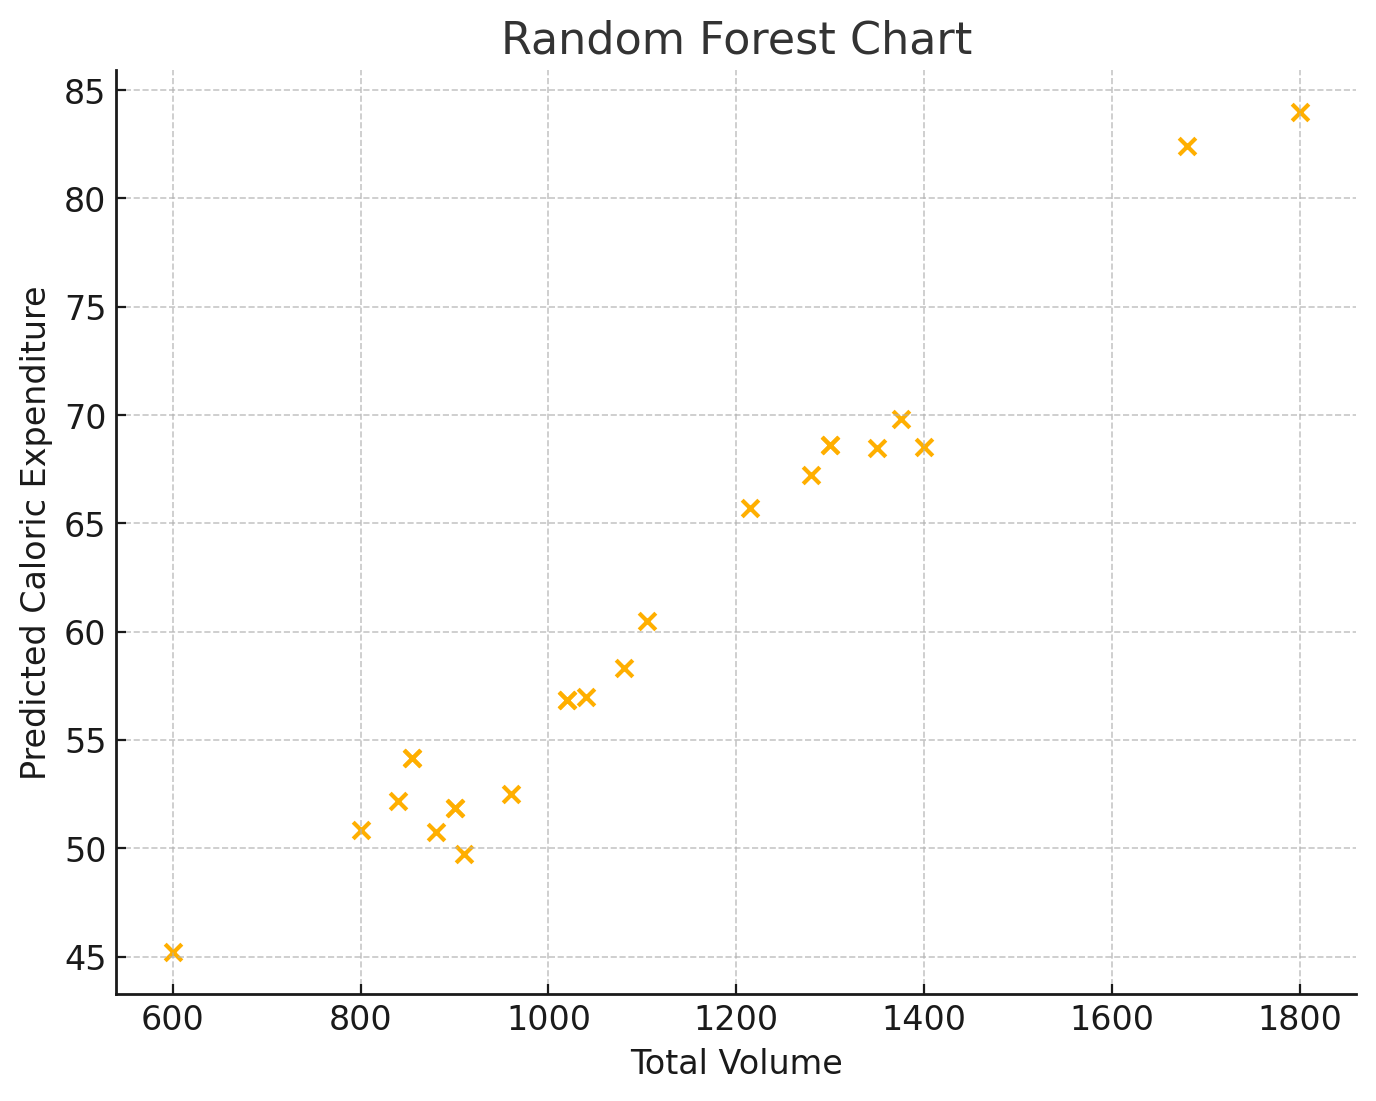

In [2]:
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [None, 10]}
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3)
grid_rf.fit(X, y)
plt.figure(figsize=(8, 6))
plt.scatter(X['Total Volume'], grid_rf.best_estimator_.predict(X))
plt.title('Random Forest Chart')
plt.xlabel('Total Volume')
plt.ylabel('Predicted Caloric Expenditure')
plt.show()

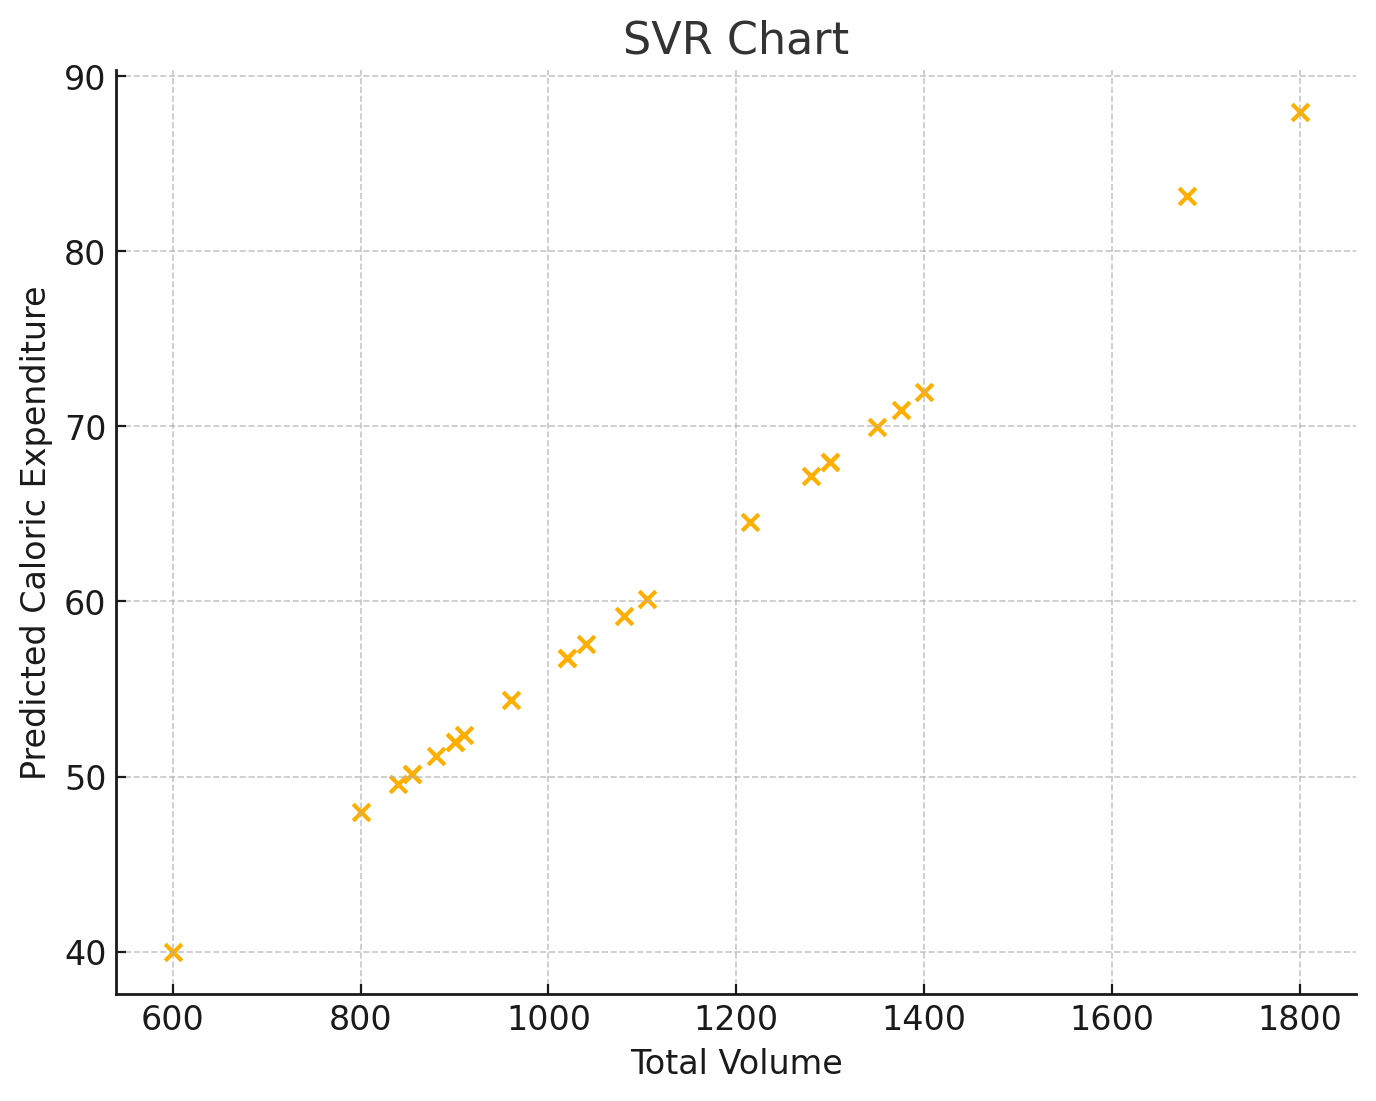

In [3]:
param_grid_svr = {'C': [1], 'epsilon': [0.1], 'kernel': ['linear']}
svr = SVR()
grid_svr = GridSearchCV(svr, param_grid_svr, cv=3)
grid_svr.fit(X, y)
plt.figure(figsize=(8, 6))
plt.scatter(X['Total Volume'], grid_svr.best_estimator_.predict(X))
plt.title('SVR Chart')
plt.xlabel('Total Volume')
plt.ylabel('Predicted Caloric Expenditure')
plt.show()

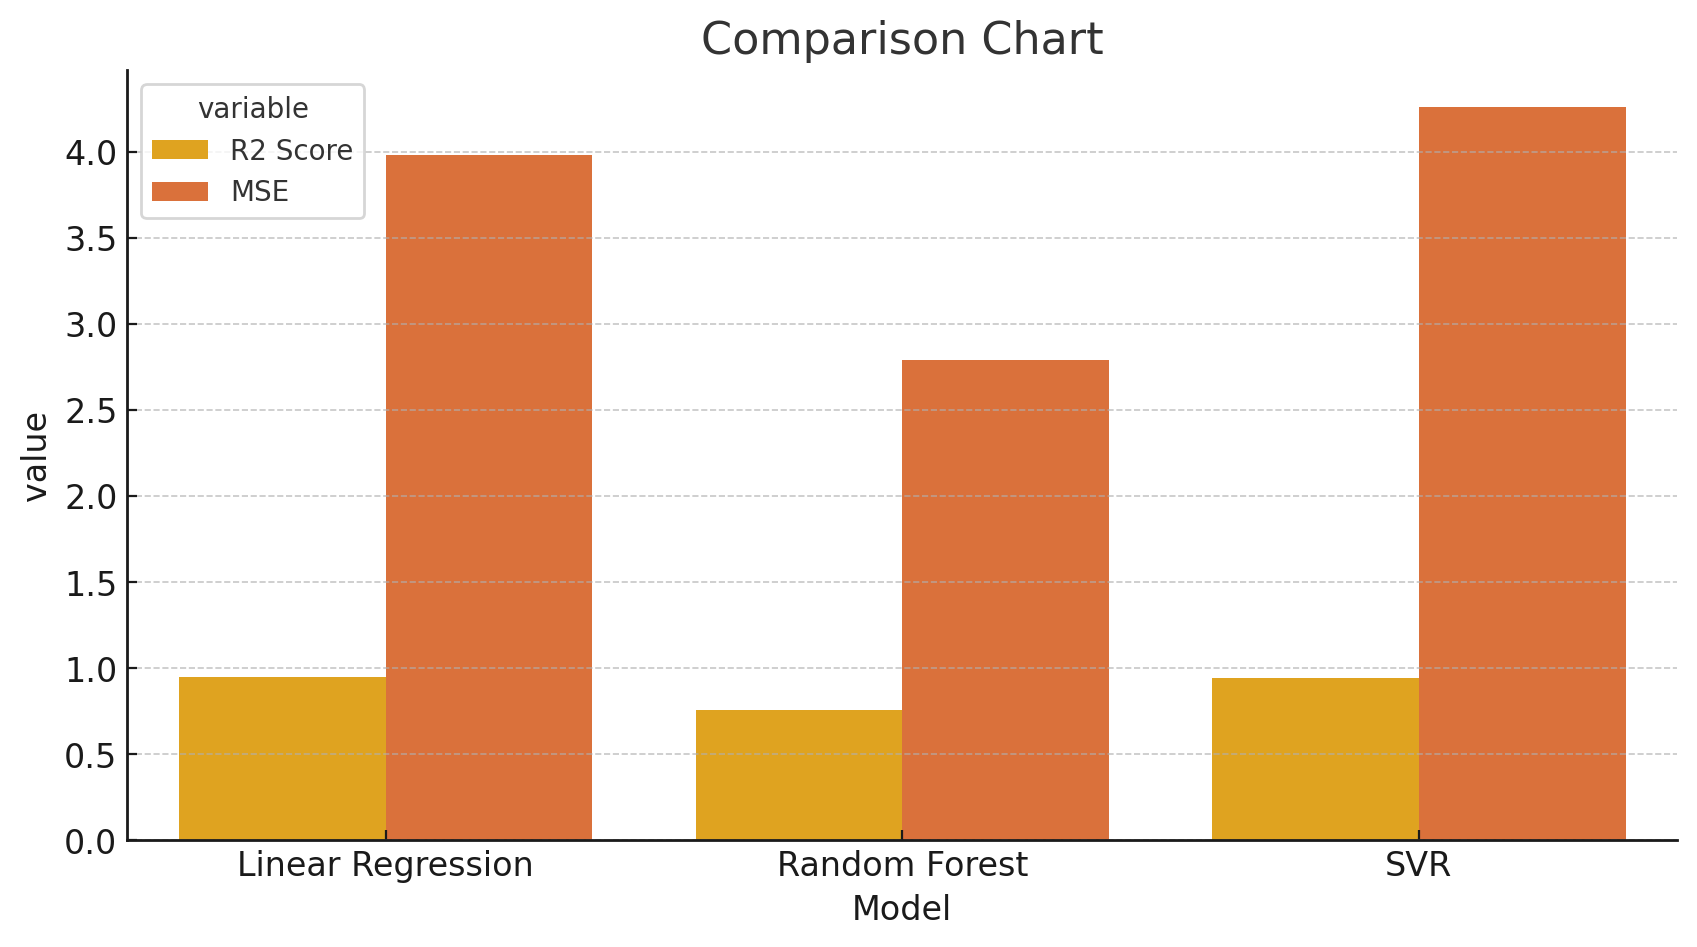

In [4]:
results = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest', 'SVR'],
    'R2 Score': [cross_val_score(LinearRegression(), X, y, cv=3, scoring='r2').mean(),
                 grid_rf.best_score_,
                 grid_svr.best_score_],
    'MSE': [mean_squared_error(y, lr.predict(X)),
            mean_squared_error(y, grid_rf.best_estimator_.predict(X)),
            mean_squared_error(y, grid_svr.best_estimator_.predict(X))]})
plt.figure(figsize=(10, 5))
sns.barplot(data=results.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title('Comparison Chart')
plt.show()